In [1]:
!python -V

Python 3.8.5


Library

In [1]:
import numpy as np
import pandas as pd
import math

In [47]:
import pickle

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error

Loading the NYC taxi dataset, "For-Hire Vehicle Trip Records". Download the data for January and February 2021.

In [4]:
df_jen = pd.read_parquet('C:/Users/Success/mlops-zoomcamp/Data/fhv_tripdata_2021-01.parquet')
df_feb= pd.read_parquet('C:/Users/Success/mlops-zoomcamp/Data/fhv_tripdata_2021-02.parquet')

In [5]:
df_jen

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,NaN,NaN,None,B00009
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,NaN,NaN,None,B00009
2,B00013,2021-01-01 00:01:00,2021-01-01 01:51:00,NaN,NaN,None,B00013
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,NaN,72.0,None,B00037
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,NaN,61.0,None,B00037
...,...,...,...,...,...,...,...
1154107,B03266,2021-01-31 23:43:03,2021-01-31 23:51:48,7.0,7.0,None,B03266
1154108,B03284,2021-01-31 23:50:27,2021-02-01 00:48:03,44.0,91.0,None,
1154109,B03285,2021-01-31 23:13:46,2021-01-31 23:29:58,171.0,171.0,None,B03285
1154110,B03285,2021-01-31 23:58:03,2021-02-01 00:17:29,15.0,15.0,None,B03285


In [29]:
df_feb

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number
0,B00013,2021-02-01 00:01:00,2021-02-01 01:33:00,NaN,NaN,None,B00014
1,B00021,2021-02-01 00:55:40,2021-02-01 01:06:20,173.0,82.0,None,B00021
2,B00021,2021-02-01 00:14:03,2021-02-01 00:28:37,173.0,56.0,None,B00021
3,B00021,2021-02-01 00:27:48,2021-02-01 00:35:45,82.0,129.0,None,B00021
4,B00037,2021-02-01 00:12:50,2021-02-01 00:26:38,NaN,225.0,None,B00037
...,...,...,...,...,...,...,...
1037687,B03282,2021-02-28 23:01:16,2021-02-28 23:14:48,NaN,31.0,None,B01717
1037688,B03282,2021-02-28 23:36:10,2021-02-28 23:47:38,NaN,169.0,None,B01717
1037689,B03285,2021-02-28 23:18:36,2021-02-28 23:43:59,28.0,171.0,None,B03285
1037690,B03285,2021-02-28 23:26:34,2021-02-28 23:44:37,16.0,252.0,None,B03285


Total number of Jenuary Record

In [7]:
QW1=len(df_jen)
QW1

1154112

Total number of Fabuary Records

In [8]:
len(df_feb)

1037692

In [9]:

df_jen['duration'] = df_jen.dropOff_datetime - df_jen.pickup_datetime
df_jen.duration = df_jen.duration.apply(lambda td: td.total_seconds() / 60)

df_jen = df_jen[(df_jen.duration >= 1) & (df_jen.duration <= 60)]

#categorical = ['PUlocationID', 'DOlocationID']
#numerical = ['trip_distance']

#df_jen[categorical] = df_jen[categorical].astype(str)

In [11]:
df_jen

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number,duration
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,NaN,NaN,None,B00009,17.000000
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,NaN,NaN,None,B00009,17.000000
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,NaN,72.0,None,B00037,8.283333
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,NaN,61.0,None,B00037,15.216667
5,B00037,2021-01-01 00:59:02,2021-01-01 01:08:05,NaN,71.0,None,B00037,9.050000
...,...,...,...,...,...,...,...,...
1154107,B03266,2021-01-31 23:43:03,2021-01-31 23:51:48,7.0,7.0,None,B03266,8.750000
1154108,B03284,2021-01-31 23:50:27,2021-02-01 00:48:03,44.0,91.0,None,,57.600000
1154109,B03285,2021-01-31 23:13:46,2021-01-31 23:29:58,171.0,171.0,None,B03285,16.200000
1154110,B03285,2021-01-31 23:58:03,2021-02-01 00:17:29,15.0,15.0,None,B03285,19.433333


In [10]:
df_jen.columns

Index(['dispatching_base_num', 'pickup_datetime', 'dropOff_datetime',
       'PUlocationID', 'DOlocationID', 'SR_Flag', 'Affiliated_base_number',
       'duration'],
      dtype='object')

In [13]:
df_jen.drop(['dispatching_base_num', 'pickup_datetime', 'dropOff_datetime', 'SR_Flag', 'Affiliated_base_number'], axis=1, inplace=True)

<ipython-input-13-45f39c30b058>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jen.drop(['dispatching_base_num', 'pickup_datetime', 'dropOff_datetime', 'SR_Flag', 'Affiliated_base_number'], axis=1, inplace=True)


In [14]:
df_jen

,PUlocationID,DOlocationID,duration
0,NaN,NaN,17.000000
1,NaN,NaN,17.000000
3,NaN,72.0,8.283333
4,NaN,61.0,15.216667
5,NaN,71.0,9.050000
...,...,...,...
1154107,7.0,7.0,8.750000
1154108,44.0,91.0,57.600000
1154109,171.0,171.0,16.200000
1154110,15.0,15.0,19.433333


average trip duration in January

In [30]:
sum_of_duration=sum(df_jen['duration'])
total_record=len(df_jen)

In [31]:
average_of_jen=sum_of_duration/total_record
average_of_jen

16.247253368247375

In [32]:
df_jen.describe()

,duration
count,1.109826e+06
mean,1.624725e+01
std,1.155150e+01
min,1.000000e+00
25%,7.850000e+00
50%,1.323333e+01
75%,2.146667e+01
max,6.000000e+01


In [17]:
df_jen.duration.describe()

count    1.109826e+06
mean     1.624725e+01
std      1.155150e+01
min      1.000000e+00
25%      7.850000e+00
50%      1.323333e+01
75%      2.146667e+01
max      6.000000e+01
Name: duration, dtype: float64

Missing Data

In [18]:
df_jen.isnull().sum()/len(df_jen)

PUlocationID    0.835273
DOlocationID    0.133270
duration        0.000000
dtype: float64

In [19]:
#Fill the missing value with -1
df_jen.fillna(-1, inplace=True)

<ipython-input-19-2153c512c69a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jen.fillna(-1, inplace=True)


In [20]:
categorical = ['PUlocationID', 'DOlocationID']
numerical = ['trip_distance']

df_jen[categorical] = df_jen[categorical].astype(str)

<ipython-input-20-4ba0d752a0fb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jen[categorical] = df_jen[categorical].astype(str)


In [21]:
df_jen

,PUlocationID,DOlocationID,duration
0,-1.0,-1.0,17.000000
1,-1.0,-1.0,17.000000
3,-1.0,72.0,8.283333
4,-1.0,61.0,15.216667
5,-1.0,71.0,9.050000
...,...,...,...
1154107,7.0,7.0,8.750000
1154108,44.0,91.0,57.600000
1154109,171.0,171.0,16.200000
1154110,15.0,15.0,19.433333


One-hot encoding

In [22]:
train_dicts = df_jen[categorical].to_dict(orient='records')

dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

In [24]:
number_of_columns=len(dv.get_feature_names())
number_of_columns


525

Training a model

In [25]:
target = 'duration'
y_train = df_jen[target].values

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

mse=mean_squared_error(y_train, y_pred, squared=False)
mse
#rmse=np.sqrt(mse)

10.528519107212144

RMSE of model

In [28]:
rmse=math.sqrt(mse)
rmse

3.244767958916653

In [29]:
df_jen

,PUlocationID,DOlocationID,duration
0,-1.0,-1.0,17.000000
1,-1.0,-1.0,17.000000
3,-1.0,72.0,8.283333
4,-1.0,61.0,15.216667
5,-1.0,71.0,9.050000
...,...,...,...
1154107,7.0,7.0,8.750000
1154108,44.0,91.0,57.600000
1154109,171.0,171.0,16.200000
1154110,15.0,15.0,19.433333


c:\Users\Success\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Success\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


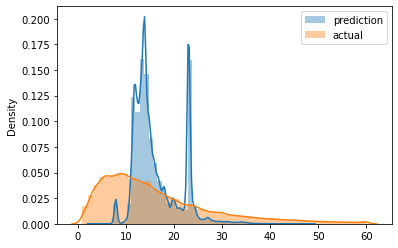

In [33]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')

plt.legend()

In [37]:
def read_dataframe(filename):
    if filename.endswith('.csv'):
        df = pd.read_csv(filename)

        df.dropOff_datetime = pd.to_datetime(df.dropOff_datetime)
        df.pickup_datetime = pd.to_datetime(df.pickup_datetime)
    elif filename.endswith('.parquet'):
        df = pd.read_parquet(filename)

    df['duration'] = df.dropOff_datetime - df.pickup_datetime
    df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

    df = df[(df.duration >= 1) & (df.duration <= 60)]

    categorical = ['PUlocationID', 'DOlocationID']
    df[categorical] = df[categorical].astype(str)
    
    return df

In [38]:
df_train = read_dataframe('C:/Users/Success/mlops-zoomcamp/Data/fhv_tripdata_2021-01.parquet')
df_val = read_dataframe('C:/Users/Success/mlops-zoomcamp/Data/fhv_tripdata_2021-02.parquet')

In [39]:
len(df_train), len(df_val)

(1109826, 990113)

In [40]:
df_train['PU_DO'] = df_train['PUlocationID'] + '_' + df_train['DOlocationID']
df_val['PU_DO'] = df_val['PUlocationID'] + '_' + df_val['DOlocationID']

In [41]:
categorical = ['PU_DO'] #'PULocationID', 'DOLocationID']
#numerical = ['trip_distance']

dv = DictVectorizer()

train_dicts = df_train[categorical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [42]:
target = 'duration'
y_train = df_train[target].values
y_val = df_val[target].values

In [50]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

mse=mean_squared_error(y_val, y_pred, squared=False)
mse

10.596293689288698

In [51]:
rmse=math.sqrt(mse)
rmse

3.255194877313599

In [52]:
with open('models/lin_reg.bin', 'wb') as f_out:
    pickle.dump((dv, lr), f_out)

In [54]:
lr = Lasso(0.01)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

mse=mean_squared_error(y_val, y_pred, squared=False)
mse

11.34764990224504

In [55]:
rmse=math.sqrt(mse)
rmse

3.368627302365912